In [1]:
import pandas as pd
import pickle


In [4]:
filename = 'fake_job_postings.csv'
job_df = pd.read_csv(filename)

In [6]:
job_df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


It is apparent that some of the columns are not relavent to our model so we can remove them.

In [83]:
pd.DataFrame(job_df.isnull().sum()).T

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,comp_prof_len,description_len,requirements_len
0,0,0,346,11547,15012,3308,1,2695,7210,0,...,0,3471,7050,8105,4903,6455,0,0,0,0


In [90]:
test = pd.DataFrame({'a' :['hello', np.nan , 'bye']}, index = [0,1,2])
test

,a
0,hello
1,NaN
2,bye


In [112]:
test = test.fillna(0)
test['length'] = list(map(lambda x: len(x) if x != 0 else x,  test.a))
test

,a,length
0,hello,5
1,0,0
2,bye,3


In [56]:
def text_length():
    comp_prof_len = []
    for i in job_df.requirements:  
        comp_prof_len.append(len(str(i)))
job_df['requirements_len'] = comp_prof_len
    


In [ ]:
map(lambda x: len(x), job_df.col)

Feature : requirements_len  real jobs: 597.9141883155049  fake jobs: 446.58314087759817


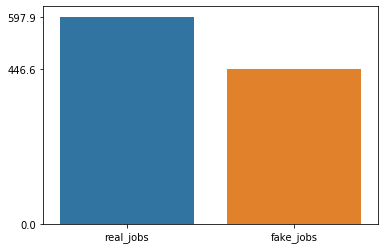

In [57]:
f_df = job_df[job_df.fraudulent == True]
r_df = job_df[job_df.fraudulent == False]

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def feature_extraction(column, normalize):
    real = r_df[column].mean() 
    fake = f_df[column].mean() 
    print(f'Feature : {column}  real jobs: {real}  fake jobs: {fake}')
    x =  pd.DataFrame({"real_jobs": real, "fake_jobs" : fake}, index = [0])
    sns.barplot(data = x, label = column)
    
    if normalize is True:
        plt.yticks([0,min(real, fake), max(real, fake)])
    
feature_extraction(column = "requirements_len", normalize= True)

In [51]:
job_df.groupby(job_df['company_profile'].isnull()).mean()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent,comp_prof_len
company_profile,,,,,,
False,8997.211502,0.036577,0.928767,0.528411,0.019146,761.852731
True,8690.681378,0.070738,0.207376,0.330109,0.177449,3.000000


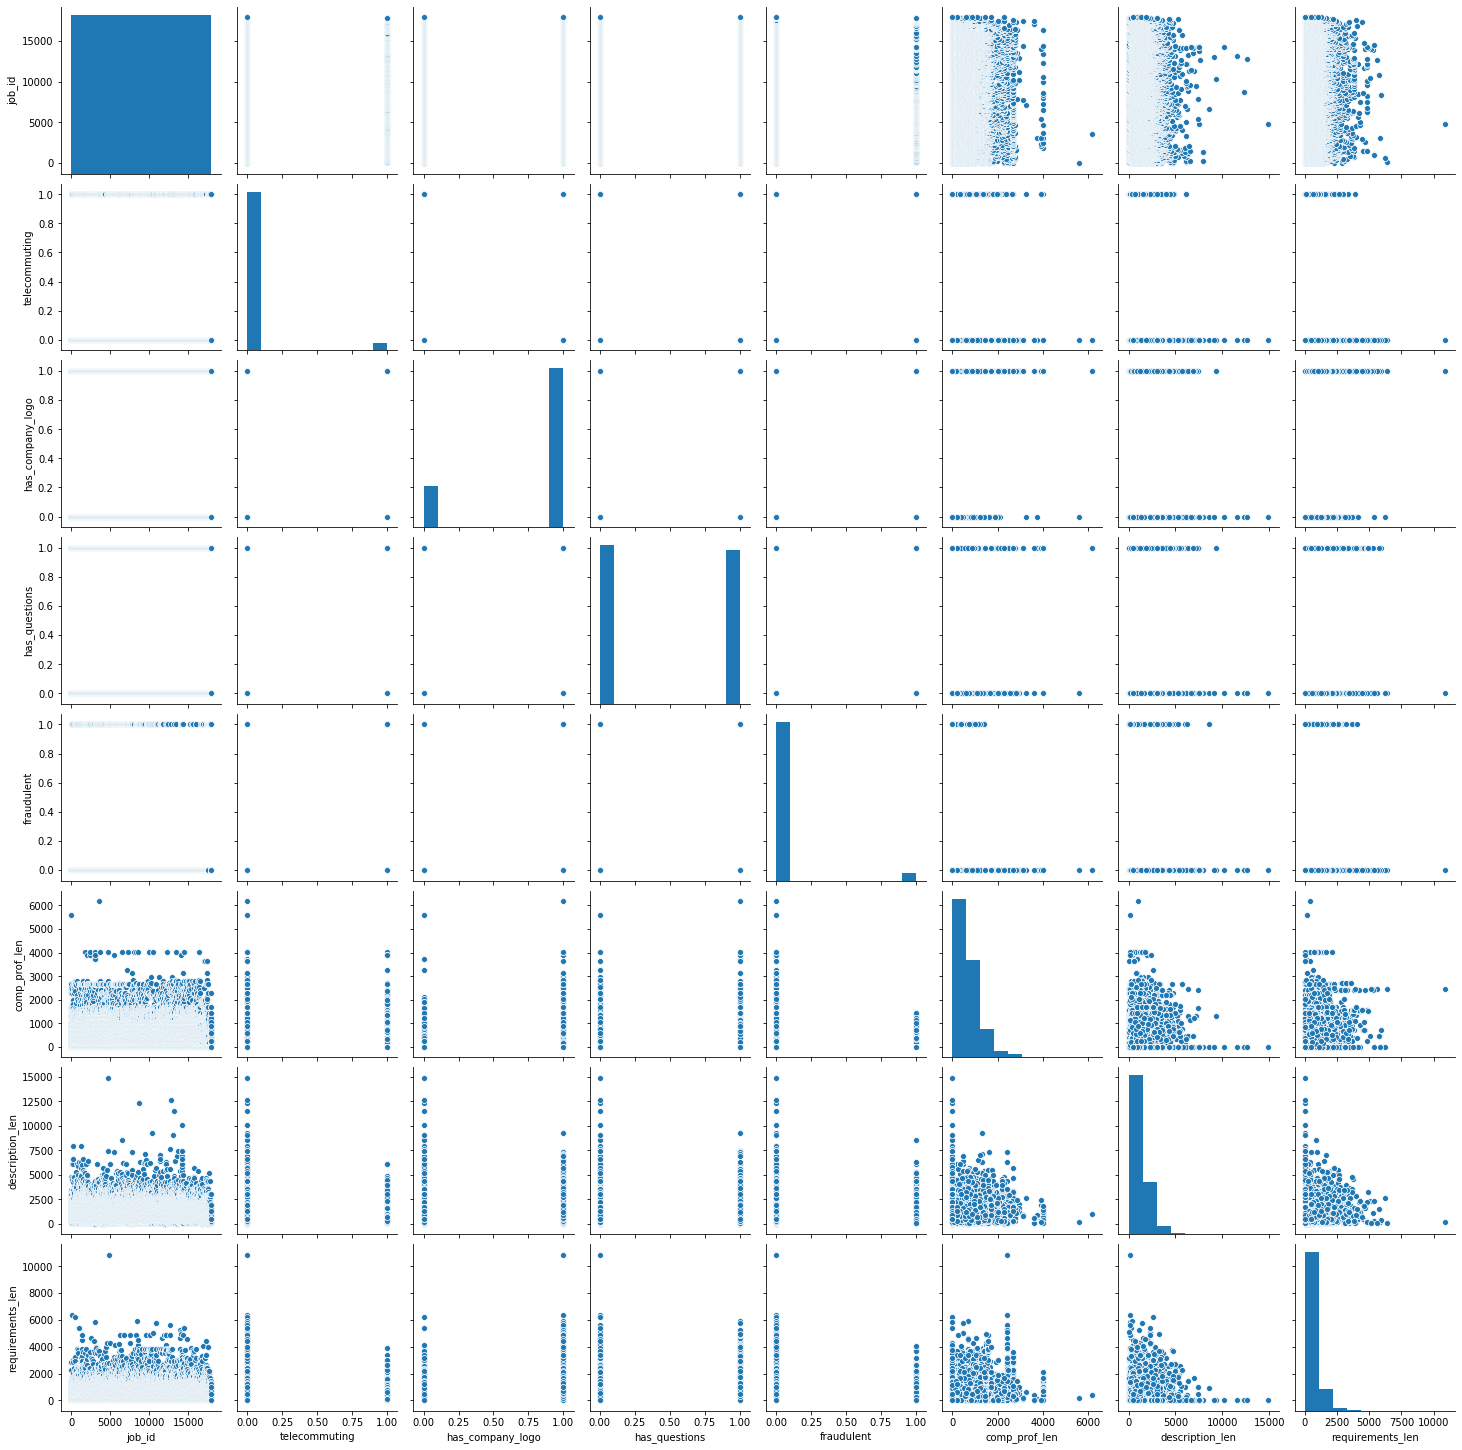

In [59]:
sns.pairplot(data = job_df)

<Figure size 432x288 with 0 Axes>

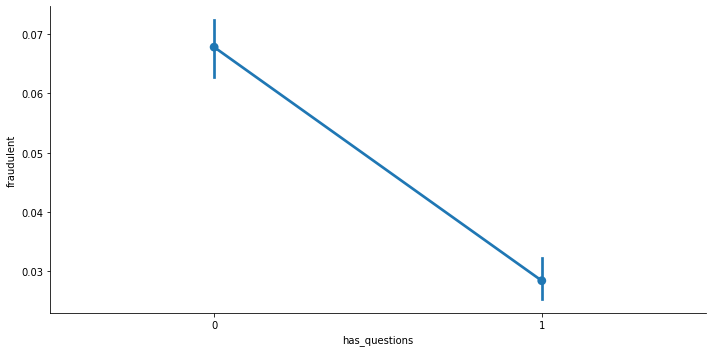

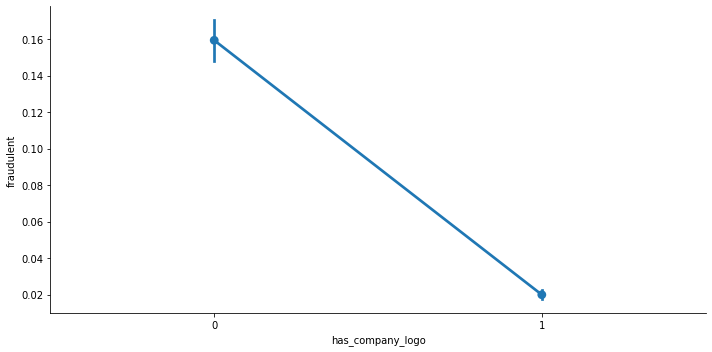

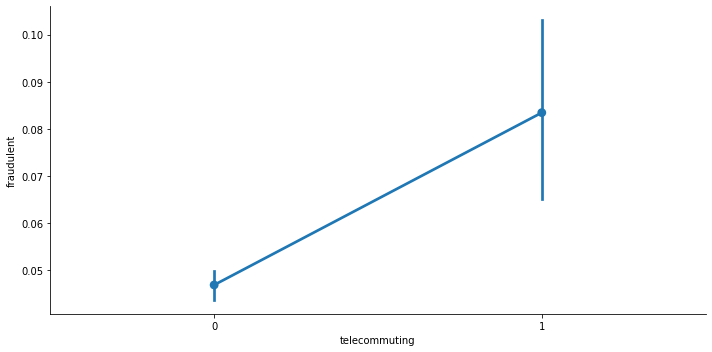

In [63]:
for i,col in enumerate(['has_questions', "has_company_logo", "telecommuting"]):
    plt.figure(i)
    sns.catplot(x=col, y= 'fraudulent', data= job_df, kind='point', aspect=2,)

Feature : comp_prof_len  real jobs: 641.2324556247796  fake jobs: 232.92494226327943


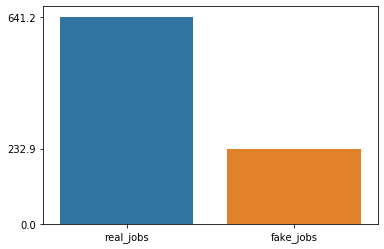

In [82]:
feature_extraction(column = "comp_prof_len", normalize= True)

In [80]:
job_df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,comp_prof_len,description_len,requirements_len
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,0,Other,Internship,NaN,NaN,Marketing,0,885,905,852
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,1286,2077,1433
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,0,879,355,1363
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,614,2600,1429
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,1628,1520,757


In [121]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [115]:
!pip install tensorflow


     |████████████████████████████████| 516.2 MB 7.5 kB/s eta 0:00:01     |████████████▉                   | 207.3 MB 116 kB/s eta 0:44:10     |████████████████████████▋       | 396.8 MB 159 kB/s eta 0:12:29
     |████████████████████████████████| 1.3 MB 171 kB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 182 kB/s eta 0:00:01
     |████████████████████████████████| 104 kB 64 kB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 186 kB/s eta 0:00:01
     |████████████████████████████████| 63 kB 151 kB/s eta 0:00:01
     |████████████████████████████████| 42 kB 181 kB/s eta 0:00:01
     |████████████████████████████████| 454 kB 173 kB/s eta 0:00:01
     |████████████████████████████████| 57 kB 173 kB/s eta 0:00:01
     |████████████████████████████████| 90 kB 181 kB/s eta 0:00:01
     |████████████████████████████████| 777 kB 184 kB/s eta 0:00:01
     |████████████████████████████████| 88 kB 173 kB/s eta 0:00:01
     |████████████████████████████████| 47 kB 192 

In [120]:
!pip install keras


     |████████████████████████████████| 170 kB 169 kB/s eta 0:00:01


In [192]:
model = keras.Sequential([keras.layers.Dense(units = 1 , input_shape =[1])])
#model = keras.Sequential([keras.layers.Dense(units = 2, input_shape =[1])])
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')


In [193]:
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)


In [194]:
model.fit(xs, ys, epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 10.3510
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 8.3567
Epoch 3/500
1/1 [==============================] - 0s 970us/step - loss: 6.7833
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 5.5411
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 4.5596
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: 3.7833
Epoch 7/500
1/1 [==============================] - 0s 1ms/step - loss: 3.1685
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 2.6809
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 2.2934
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 1.9848
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 1.7382
Epoch 12/500
1/1 [==============================] - 0s 1ms/step - loss: 1.5406
Epoch 13/500
1/1 [==============================] - 0s 1ms

1/1 [==============================] - 0s 1ms/step - loss: 0.1303
Epoch 105/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1277
Epoch 106/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1250
Epoch 107/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1225
Epoch 108/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1200
Epoch 109/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1175
Epoch 110/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1151
Epoch 111/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1127
Epoch 112/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1104
Epoch 113/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1081
Epoch 114/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1059
Epoch 115/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1037
Epoch 116/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 1ms/step - loss: 0.0157
Epoch 207/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 208/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 209/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0147
Epoch 210/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 211/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0141
Epoch 212/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0139
Epoch 213/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 214/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 215/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 216/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 217/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 218/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 309/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 310/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 311/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 312/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 313/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 314/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 315/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 316/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 317/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 318/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 319/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 320/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 1ms/step - loss: 2.4209e-04
Epoch 408/500
1/1 [==============================] - 0s 1ms/step - loss: 2.3712e-04
Epoch 409/500
1/1 [==============================] - 0s 1ms/step - loss: 2.3225e-04
Epoch 410/500
1/1 [==============================] - 0s 1ms/step - loss: 2.2747e-04
Epoch 411/500
1/1 [==============================] - 0s 2ms/step - loss: 2.2280e-04
Epoch 412/500
1/1 [==============================] - 0s 1ms/step - loss: 2.1822e-04
Epoch 413/500
1/1 [==============================] - 0s 2ms/step - loss: 2.1374e-04
Epoch 414/500
1/1 [==============================] - 0s 1ms/step - loss: 2.0935e-04
Epoch 415/500
1/1 [==============================] - 0s 1ms/step - loss: 2.0505e-04
Epoch 416/500
1/1 [==============================] - 0s 1ms/step - loss: 2.0084e-04
Epoch 417/500
1/1 [==============================] - 0s 2ms/step - loss: 1.9672e-04
Epoch 418/500
1/1 [==============================] - 0s 2ms/step - loss: 1.9267e-04
Epoch 

In [197]:
pred = model.predict([10])

In [198]:
print(pred)

[[18.982706]]
